# Which Debts Are Worth the Bank's Effort?

## 1. Regression discontinuity: banking recovery

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("bank_data.csv")

In [3]:
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [4]:
df.tail()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female
1881,522,9964,16706.305920,Level 4 Recovery,53,Male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [6]:
df.shape

(1882, 6)

In [7]:
df.nunique()

id                          1882
expected_recovery_amount    1529
actual_recovery_amount      1882
recovery_strategy              5
age                           67
sex                            2
dtype: int64

In [8]:
df.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [9]:
df.isna().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

## 2 . Graphical exploratory data analysis

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
d = df[(df["expected_recovery_amount"]>0) & (df["expected_recovery_amount"]<2000)]

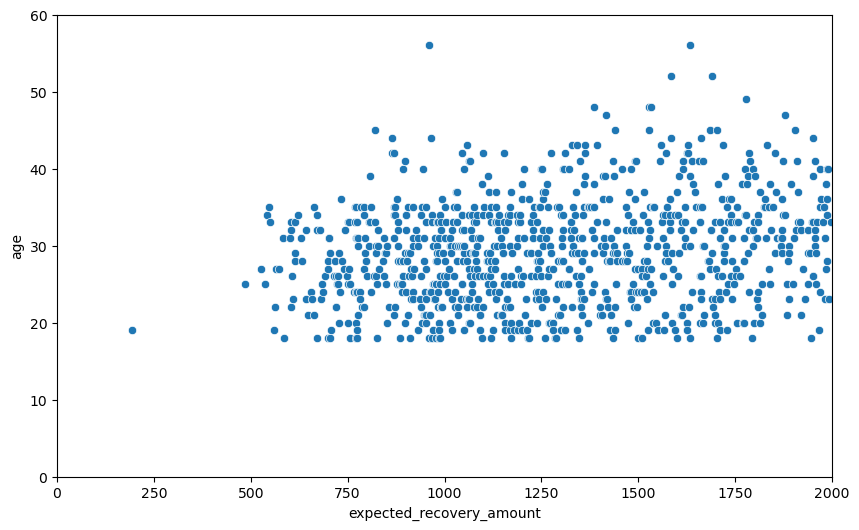

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "expected_recovery_amount",y = "age",data = d )
plt.xlim(0, 2000)
plt.ylim(0, 60)
plt.show()

 ## 3 . Statistical test: age vs. expected recovery amount

In [13]:
d = df[(df["expected_recovery_amount"]>900) & (df["expected_recovery_amount"]<1100)]

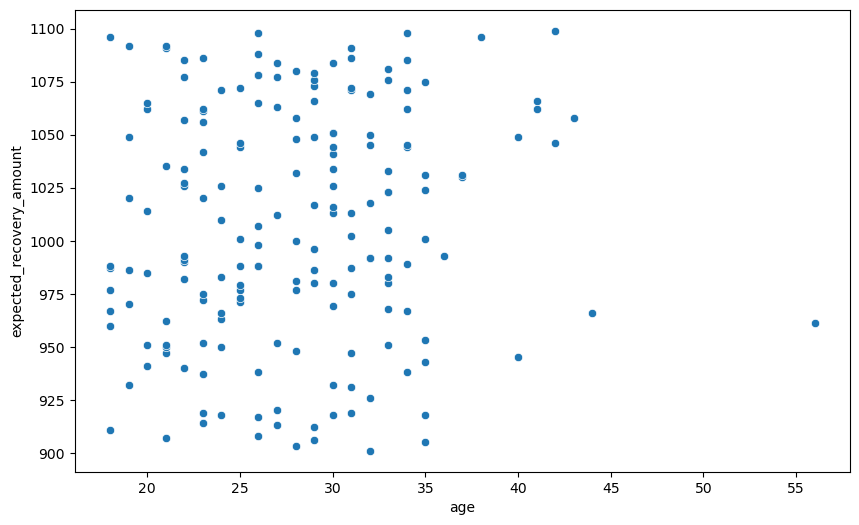

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "age",y = "expected_recovery_amount",data = d )
plt.show()

In [15]:
import pandas as pd
from scipy import stats

d = df[(df["expected_recovery_amount"]>900) & (df["expected_recovery_amount"]<1100)]
d = d.groupby(["recovery_strategy"])

In [16]:
Level_0_age = d.get_group("Level 0 Recovery")["age"]
Level_1_age = d.get_group("Level 1 Recovery")["age"]

In [17]:
t_stat, p_value = stats.ttest_ind(Level_0_age, Level_1_age)
# Print the results
print(f"t-statistic: {t_stat}")
print(f"P-value: {p_value}")

t-statistic: -1.8039406744727593
P-value: 0.07293138511774412


In [18]:
d['age'].describe().unstack()

       recovery_strategy
count  Level 0 Recovery     86.000000
       Level 1 Recovery     94.000000
mean   Level 0 Recovery     27.104651
       Level 1 Recovery     28.755319
std    Level 0 Recovery      6.416943
       Level 1 Recovery      5.859807
min    Level 0 Recovery     18.000000
       Level 1 Recovery     18.000000
25%    Level 0 Recovery     22.250000
       Level 1 Recovery     24.000000
50%    Level 0 Recovery     26.000000
       Level 1 Recovery     29.000000
75%    Level 0 Recovery     31.000000
       Level 1 Recovery     33.000000
max    Level 0 Recovery     56.000000
       Level 1 Recovery     43.000000
dtype: float64

## 4 . Statistical test: sex vs. expected recovery amount

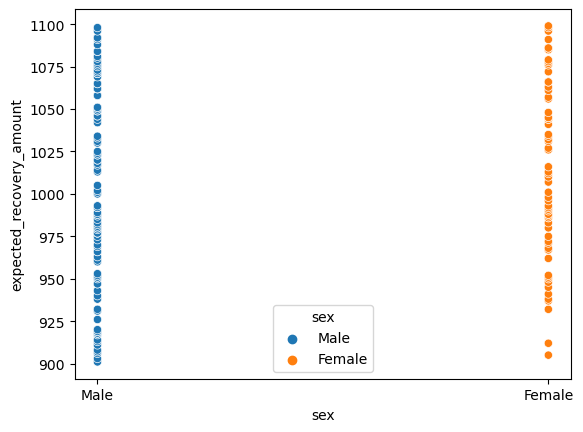

In [19]:
d = df[(df["expected_recovery_amount"]>900) & (df["expected_recovery_amount"]<1100)]
sns.scatterplot(x = "sex",y = "expected_recovery_amount",data =d, hue="sex")
plt.show()

In [20]:
crosstab = pd.crosstab(df.loc[(df['expected_recovery_amount']<1100) &
                              (df['expected_recovery_amount']>=900)]['recovery_strategy'],
                       df['sex'])
print(crosstab)

chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab)

sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55


In [21]:
p_val

0.5377947810444592

## 5. Exploratory graphical analysis: recovery amount

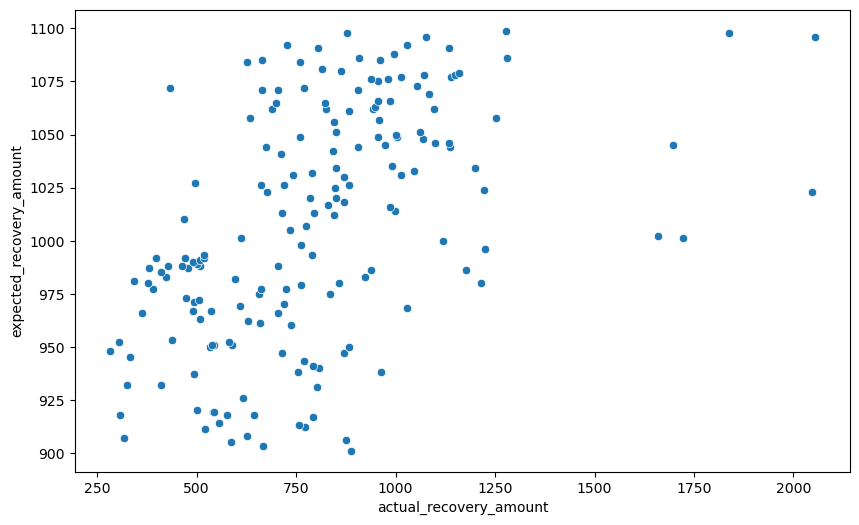

In [22]:
d = df[(df["expected_recovery_amount"]>900) & (df["expected_recovery_amount"]<1100)]
plt.figure(figsize=(10,6))
sns.scatterplot(x="actual_recovery_amount",y="expected_recovery_amount",data =d)
plt.show()

## 6 . Statistical analysis: recovery amount

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

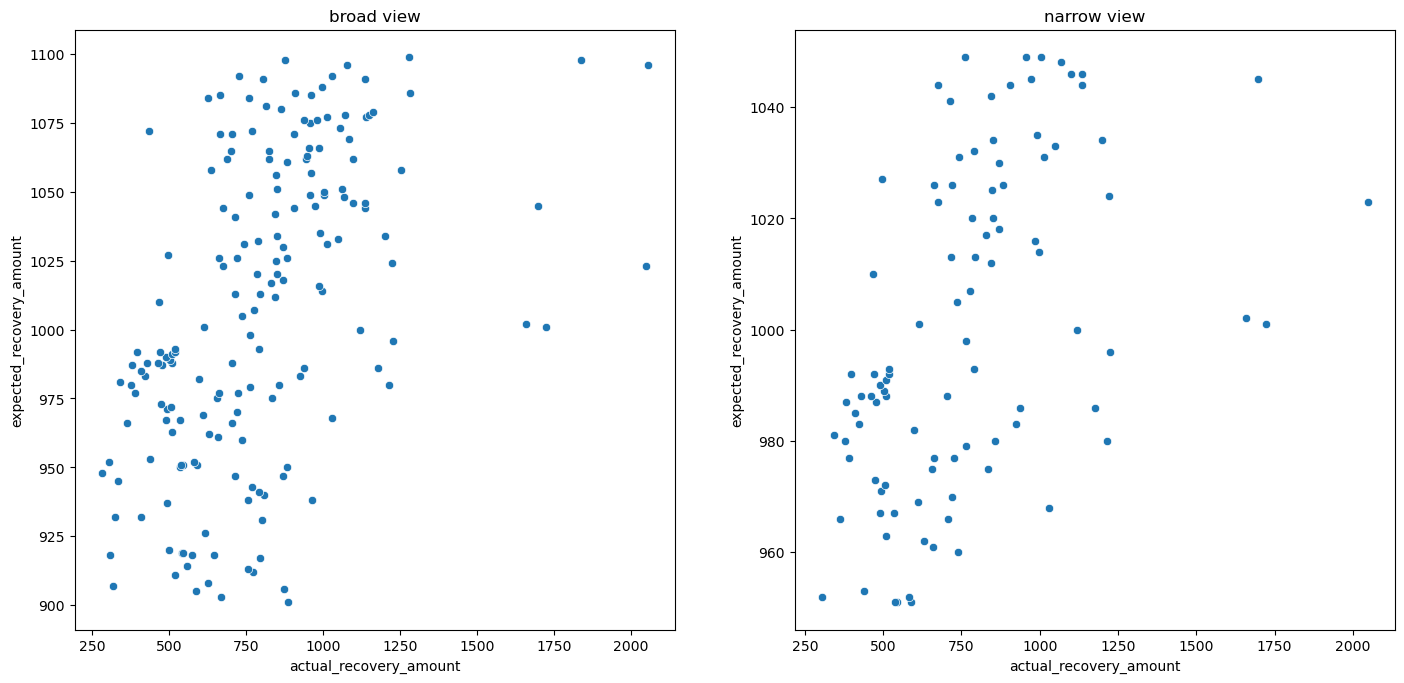

In [24]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_axes([0,0,1,1])
ax1.set_title("broad view")
d = df[(df["expected_recovery_amount"]>900) & (df["expected_recovery_amount"]<1100)]
sns.scatterplot(x="actual_recovery_amount",y="expected_recovery_amount",data =d)
ax2 =fig.add_axes([1.2,0,1,1])
ax2.set_title("narrow view")
d = df[(df["expected_recovery_amount"]>950) & (df["expected_recovery_amount"]<1050)]
sns.scatterplot(x="actual_recovery_amount",y="expected_recovery_amount",data =d)
plt.show()

In [25]:
import scipy.stats as stats

# Create data for three or more independent groups
d1 = df[(df["expected_recovery_amount"]>900) & (df["expected_recovery_amount"]<1100)]
d2 = df[(df["expected_recovery_amount"]>950) & (df["expected_recovery_amount"]<1050)]

# Perform the Kruskal-Wallis test
Level_0_actual = d1.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = d1.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
print(stats.kruskal(Level_0_actual, Level_1_actual) )


Level_0_actual = d2.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = d2.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
print(stats.kruskal(Level_0_actual, Level_1_actual) )



KruskalResult(statistic=62.65452527467119, pvalue=2.463383030679213e-15)
KruskalResult(statistic=30.648790562537158, pvalue=3.0921928648481067e-08)


## 7 . Regression modeling: no threshold

In [26]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
import statsmodels.api as sm

# Define X and y
X = d['expected_recovery_amount']
y = d['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the model summary statistics
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.243
Model:                                OLS   Adj. R-squared:                  0.235
Method:                     Least Squares   F-statistic:                     30.55
Date:                    Fri, 06 Oct 2023   Prob (F-statistic):           2.84e-07
Time:                            12:27:48   Log-Likelihood:                -682.21
No. Observations:                      97   AIC:                             1368.
Df Residuals:                          95   BIC:                             1374.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

## 8 . Regression modeling: adding true threshold

In [28]:
threshold = 1000

In [29]:
# Create indicator (0 or 1) for expected recovery amount >= $1000
import numpy as np
df['indicator_1000'] = np.where(df['expected_recovery_amount']<1000, 0, 1)
r_900_1100 = df.loc[(df['expected_recovery_amount']<1100) &
                      (df['expected_recovery_amount']>=900)]

# Define X and y
X = r_900_1100[['expected_recovery_amount','indicator_1000']]
y = r_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Fri, 06 Oct 2023   Prob (F-statistic):           1.83e-15
Time:                            12:27:48   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

## 9 . Regression modeling: adjusting the window

In [30]:
y = d["expected_recovery_amount"]

In [31]:
window_size = 3

In [32]:
binary_outcomes = []

In [33]:
y = y.reset_index(drop=True)

In [34]:
import numpy as np

# Sample data (replace this with your own data)
y = y
window_size = 3
binary_outcomes = []

for i in range(len(y)):
    if i < window_size - 1:
        threshold = np.mean(y[:i + 1])
        if y[i] >= threshold:
            binary_outcomes.append(1)
        else:
            binary_outcomes.append(0)
    else:
        threshold = np.mean(y[i - window_size + 1: i + 1])
        if y[i] >= threshold:
            binary_outcomes.append(1)
        else:
            binary_outcomes.append(0)

print(binary_outcomes)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [35]:

# Redefine era_950_1050 so the indicator variable is included
d = df.loc[(df['expected_recovery_amount']<1050) &
                      (df['expected_recovery_amount']>=950)]

# Define X and y
X = d[['expected_recovery_amount','indicator_1000']]
y = d['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Fri, 06 Oct 2023   Prob (F-statistic):           1.12e-07
Time:                            12:27:49   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
indicator_1000             286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""